## Постановка задачі

**Задача класифікації для визначення діагнозу раку грудної залози**

**Контекст**: Рак грудної залози є однією з найбільш поширених форм раку серед жінок по всьому світу. Рання діагностика є критичною для успішного лікування та підвищення шансів на одужання. Медичні дослідження часто генерують великі обсяги даних, які можуть бути аналізовані для виявлення потенційних закономірностей та визначення ризиків.

**Задача**: Розробка класифікаційної моделі на основі машинного навчання, яка б могла автоматизувати процес розподілу пухлин грудної залози на доброякісні (benign) та злоякісні (malignant), використовуючи клінічні та демографічні дані пацієнтів.

**Дані**: Власний датасет містить клінічні ознаки, зібрані з медичних записів пацієнтів, включаючи вимірювання пухлин, біохімічні маркери, результати зображень, історію хвороби та інші демографічні характеристики.

**Цільова змінна**: 'diagnosis' - категорійна змінна з двома можливими класами: 'benign' для доброякісних та 'malignant' для злоякісних пухлин.

**Мета**: Розробити модель, яка з високою точністю зможе класифікувати нові випадки на основі доступних ознак, забезпечуючи лікарям потужний інструмент для підтримки прийняття рішень у діагностиці та плануванні лікування.

**Важливість**: Успішно розроблена модель може значно підвищити ефективність скринінгових процедур, знижуючи частоту інвазивних процедур, таких як біопсія, та сприяючи більш ранньому виявленню злоякісних випадків, що в свою чергу може підвищити шанси пацієнтів на успішне лікування.

## Імпорт необхідних бібліотек

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, roc_auc_score

from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import GridSearchCV

from sklearn.pipeline import Pipeline

In [2]:
# Зчитування даних
data=pd.read_csv('data.csv')

## Дослідження датасету

In [3]:
df=pd.DataFrame(data)

In [4]:
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [5]:
df.columns

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst', 'Unnamed: 32'],
      dtype='object')

In [6]:
df.describe()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,0.0
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,NaN
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,NaN
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,NaN
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,NaN
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,NaN
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,NaN
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,NaN


In [4]:
df=df.drop('Unnamed: 32',axis=1)
df=df.drop('id',axis=1)

In [8]:
count_M = df[df['diagnosis'] == 'M'].shape[0]
count_B = df[df['diagnosis'] == 'B'].shape[0]


total_count = df.shape[0]


percentage_M = (count_M / total_count) * 100
percentage_B = (count_B / total_count) * 100

print(f"Відсоток злоякісних випадків: {round(percentage_M,2)}%")
print(f"Відсоток доброякісних випадків: {round(percentage_B,2)}%" )

Відсоток злоякісних випадків: 37.26%
Відсоток доброякісних випадків: 62.74%


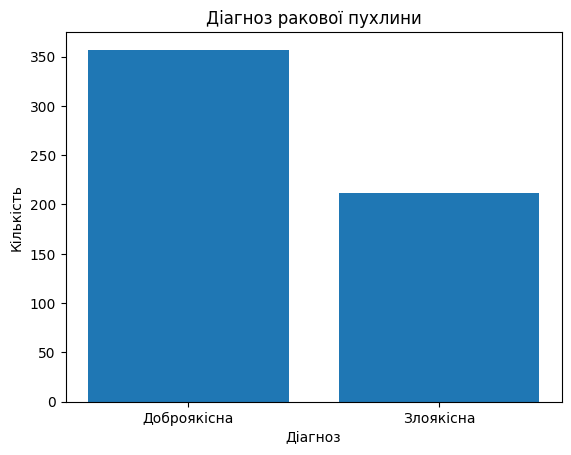

In [9]:
diabetes_counts = df['diagnosis'].value_counts()
plt.bar(diabetes_counts.index, diabetes_counts.values)
plt.xlabel('Діагноз')
plt.ylabel('Кількість')
plt.title('Діагноз ракової пухлини')
plt.xticks(['B', 'M'], ['Доброякісна', 'Злоякісна'])
plt.show()

In [5]:
# Поділ датасету на набір ознак X та набір міток цільової змінної y
X0 = df[['radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean']]
y0 = df['diagnosis']

In [6]:
# Перетворення категоріальних міток на числові
label_encoder = LabelEncoder()
y= label_encoder.fit_transform(y0)

In [7]:
# Стандартизція ознак
scaler=StandardScaler()
x=scaler.fit_transform(X0)

In [8]:
X=np.array(x)
Y=np.array(y)

In [9]:
# Поділ датасету на навчальну та тренувальну вибірки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Логістична регресія

In [10]:
lg = LogisticRegression()
lg.fit(X_train, y_train)
y_test_pred = lg.predict(X_test)
y_train_pred = lg.predict(X_train)

# Оцінка моделі
acc_test = accuracy_score(y_test, y_test_pred)
acc_train = accuracy_score(y_train, y_train_pred)
recall_test = recall_score(y_test, y_test_pred)
precision_test = precision_score(y_test, y_test_pred)
f1_test = f1_score(y_test, y_test_pred)
roc_auc = roc_auc_score(y_test, lg.predict_proba(X_test)[:, 1])

# Виведення результатів
print("Accuracy Train:", acc_train, "Accuracy Test:", acc_test)
print("Recall Test:", recall_test)
print("Precision Test:", precision_test)
print("F1 Test:", f1_test)
print("ROC AUC Test:", roc_auc)

# Налаштування гіперпараметрів за допомогою GridSearchCV
param_grid = {
    'C': [0.01, 0.1, 1, 10, 100],
    'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']
}
grid_search = GridSearchCV(LogisticRegression(max_iter=10000, penalty='l2'), param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Виведення найкращих параметрів
print("Best parameters:", grid_search.best_params_)
print("Best cross-validation score:", grid_search.best_score_)

Accuracy Train: 0.9428571428571428 Accuracy Test: 0.9385964912280702
Recall Test: 0.9069767441860465
Precision Test: 0.9285714285714286
F1 Test: 0.9176470588235294
ROC AUC Test: 0.9924664264657713
Best parameters: {'C': 1, 'solver': 'newton-cg'}
Best cross-validation score: 0.9406593406593406


Модель логістичної регресії демонструє високу точність на тренувальному наборі (94.29%), що свідчить про добре навчання на доступних даних. На тестовому наборі точність становить 93.86%, що також є високим показником і вказує на гарну узагальнювальну здатність моделі. Відсутність великої різниці між точністю на тренувальному та тестовому наборах може свідчити про те, що модель не має значного перенавчання, а здатна достовірно прогнозувати класи на нових даних.

Значення Recall на тестовому наборі (90.70%) вказує на високу здатність моделі правильно ідентифікувати позитивні випадки, тоді як Precision (92.86%) показує ефективність моделі у зменшенні помилково позитивних результатів. Високий F1 Score (91.67%) підкреслює збалансованість моделі між Recall і Precision, роблячи її добре пристосованою для задач, де обидва аспекти є критично важливими.

ROC AUC вартість 99.25% вказує на виняткову здатність моделі розрізняти між класами.

Вибір гіперпараметрів `C=1` та `solver='newton-cg'` за допомогою GridSearchCV і найкращий результат крос-валідації 94.06% демонструють, що вибрані налаштування є оптимальними з точки зору балансу між складністю моделі та її точністю на перевірочних даних. Використання `newton-cg` як розв'язника свідчить про те, що для даних, які добре відділяються лінійно, не потрібна регуляризація більш високого порядку, а точність може бути досягнута з допомогою правильної оптимізації параметрів моделі.

In [22]:
coefficients = lg.coef_[0]  # коефіцієнти для кожної ознаки
intercept = lg.intercept_[0]  # вільний член

print("Коєфіційєнти регресії:", coefficients)
print("Вільний член:", intercept)

Коєфіційєнти регресії: [ 0.93998617  1.3565347   0.85088378  1.14647199  0.99904251 -0.54746773
  0.94349535  1.74991109  0.43920271 -0.29896557]
Вільний член: -0.5580972201466661


In [34]:
# Виберімо випадковий семпл з X_test
sample = X_test[1]
true_lable = y_test[1]
print("Зразок:", sample)
print("Клас зразка:", true_lable)

# Винесемо всі ознаки
x1 = sample[0]
x2 = sample[1]
x3 = sample[2]
x4 = sample[3]
x5 = sample[4]
x6 = sample[5]
x7 = sample[6]
x8 = sample[7]
x9 = sample[8]
x10 = sample[9]

# Обрахуємо y - лінійну комбінацію ознак семплу з коефіцієнтами моделі
linear_combination = (x1*coefficients[0]+x2*coefficients[1]+x3*coefficients[2]+x4*coefficients[3]+x5*coefficients[4]+
                      x6*coefficients[5]+x7*coefficients[6]+x8*coefficients[7]+x9*coefficients[8]+x10*coefficients[9]+intercept)
print("\nОбрахована лінійна комбінація:", linear_combination)

# Обчислюємо ймовірність належності семплу до класів за допомогою сигмоїдної функції
probability_class_1 = 1 / (1 + np.exp(-linear_combination))
probability_class_0 = 1 - probability_class_1
print("\nЙмовірність належності до класу 1:", probability_class_1)
print("Ймовірність належності до класу 0:", probability_class_0)

# Використовуємо модель для прогнозування класу семплу
predicted_class = lg.predict(sample.reshape(1, -1))

# Виводимо результати
print("\nСправжній клас зразка:", true_lable)
print("Обрахований клас зразка:", max(probability_class_1, probability_class_0))
print("Визначений моделлю клас зразка:", predicted_class)

Зразок: [ 1.36687747  0.47014935  1.30288585  1.35126414 -0.44622733 -0.02730878
  0.24106404  0.78905995 -0.83832462 -1.16067889]
Клас зразка: 1

Обрахована лінійна комбінація: 5.178500275376261

Ймовірність належності до класу 1: 0.9943951383339557
Ймовірність належності до класу 0: 0.005604861666044347

Справжній клас зразка: 1
Обрахований клас зразка: 0.9943951383339557
Визначений моделлю клас зразка: [1]


## Логістична регресія з поліноміальними змінними

In [16]:
# Створення поліноміальних ознак
poly = PolynomialFeatures(degree=2, include_bias=False)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

# Проста модель логістичної регресії з поліноміальними ознаками
lg_poly = LogisticRegression(max_iter=10000)
lg_poly.fit(X_train_poly, y_train)
y_test_pred_poly = lg_poly.predict(X_test_poly)
y_train_pred_poly = lg_poly.predict(X_train_poly)

# Оцінка моделі
acc_test_poly = accuracy_score(y_test, y_test_pred_poly)
acc_train_poly = accuracy_score(y_train, y_train_pred_poly)
recall_test_poly = recall_score(y_test, y_test_pred_poly)
precision_test_poly = precision_score(y_test, y_test_pred_poly)
f1_test_poly = f1_score(y_test, y_test_pred_poly)
roc_auc_poly = roc_auc_score(y_test, lg_poly.predict_proba(X_test_poly)[:, 1])

# Виведення результатів
print("Accuracy Train:", acc_train_poly, "Accuracy Test:", acc_test_poly)
print("Recall Test:", recall_test_poly)
print("Precision Test:", precision_test_poly)
print("F1 Test:", f1_test_poly)
print("ROC AUC Test:", roc_auc_poly)

# Налаштування гіперпараметрів за допомогою GridSearchCV для поліноміальної моделі
# Враховуючи складність, обмежимося меншим діапазоном C та не включаємо поліном степеня у пошук
param_grid_poly = {
    'logisticregression__C': [0.01, 0.1, 1, 10, 100],
    'logisticregression__solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']
}

pipeline = Pipeline([
    ('poly', PolynomialFeatures(degree=2, include_bias=False)),
    ('logisticregression', LogisticRegression(max_iter=10000, penalty='l2'))
])

grid_search_poly = GridSearchCV(pipeline, param_grid_poly, cv=5, scoring='accuracy')
grid_search_poly.fit(X_train, y_train)

# Виведення найкращих параметрів для поліноміальної моделі
print("Best parameters:", grid_search_poly.best_params_)
print("Best cross-validation score:", grid_search_poly.best_score_)

Accuracy Train: 0.967032967032967 Accuracy Test: 0.9824561403508771
Recall Test: 0.9534883720930233
Precision Test: 1.0
F1 Test: 0.9761904761904763
ROC AUC Test: 0.9941041598427776
Best parameters: {'logisticregression__C': 10, 'logisticregression__solver': 'newton-cg'}
Best cross-validation score: 0.956043956043956


Модель показує вражаючу точність на тестовому наборіʼ, що значно вище, ніж на тренувальному наборі. Це може свідчити про те, що модель добре узагальнює дані та ефективно працює на нових даних і не перенавчається. Варто відмітити ідеальний показник Precision (1.0) на тестовому наборі означає, що всі випадки, класифіковані як позитивні, є коректними.

Вибір C=10 під час оптимізації гіперпараметрів з найкращим результатом крос-валідації 95.60% показує, що деякий ступінь регуляризації допомагає покращити здатність моделі до узагальнення.

## Метод найближчих сусідів k-nearest neighbors (k-NN)

In [17]:
# Створення моделі k-NN
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
y_test_pred_knn = knn.predict(X_test)
y_train_pred_knn = knn.predict(X_train)

# Оцінка моделі k-NN
acc_test_knn = accuracy_score(y_test, y_test_pred_knn)
acc_train_knn = accuracy_score(y_train, y_train_pred_knn)
recall_test_knn = recall_score(y_test, y_test_pred_knn)
precision_test_knn = precision_score(y_test, y_test_pred_knn)
f1_test_knn = f1_score(y_test, y_test_pred_knn)
roc_auc_knn = roc_auc_score(y_test, knn.predict_proba(X_test)[:, 1])

# Виведення результатів
print("Accuracy Train:", acc_train_knn, "Accuracy Test:", acc_test_knn)
print("Recall Test:", recall_test_knn)
print("Precision Test:", precision_test_knn)
print("F1 Test:", f1_test_knn)
print("ROC AUC Test:", roc_auc_knn)

# Налаштування гіперпараметрів за допомогою GridSearchCV для моделі k-NN
param_grid_knn = {
    'n_neighbors': [1, 3, 5, 7, 9, 11],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan', 'minkowski']
}

grid_search_knn = GridSearchCV(KNeighborsClassifier(), param_grid_knn, cv=5, scoring='accuracy')
grid_search_knn.fit(X_train, y_train)

# Виведення найкращих параметрів для моделі k-NN
print("Best parameters:", grid_search_knn.best_params_)
print("Best cross-validation score:", grid_search_knn.best_score_)


Accuracy Train: 0.9560439560439561 Accuracy Test: 0.9473684210526315
Recall Test: 0.9302325581395349
Precision Test: 0.9302325581395349
F1 Test: 0.9302325581395349
ROC AUC Test: 0.9806747461513265
Best parameters: {'metric': 'manhattan', 'n_neighbors': 9, 'weights': 'uniform'}
Best cross-validation score: 0.9428571428571428


Модель k-NN з 9 сусідами показує сильні результати з точністю 94.74% на тестовому наборі, що добре корелює з точністю на тренувальному наборі (95.60%). Це говорить про ефективність моделі в узагальненні та здатність добре працювати з невидимими даними.
Високий показник ROC AUC (98.07%) свідчить про здібність моделі ефективно розрізняти між класами.

Використання метрики 'manhattan' може допомагати в умовах, коли різниця між класами є лінійною, і дає краще відображення структури даних, ніж стандартна евклідова відстань.

## Дерево рішень

In [18]:
# Створення та тренування моделі дерева рішень
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y_train)
y_test_pred_dt = dt.predict(X_test)
y_train_pred_dt = dt.predict(X_train)

# Оцінка моделі дерева рішень
acc_test_dt = accuracy_score(y_test, y_test_pred_dt)
acc_train_dt = accuracy_score(y_train, y_train_pred_dt)
recall_test_dt = recall_score(y_test, y_test_pred_dt)
precision_test_dt = precision_score(y_test, y_test_pred_dt)
f1_test_dt = f1_score(y_test, y_test_pred_dt)
roc_auc_dt = roc_auc_score(y_test, dt.predict_proba(X_test)[:, 1])

# Виведення результатів
print("Accuracy Train:", acc_train_dt, "Accuracy Test:", acc_test_dt)
print("Recall Test:", recall_test_dt)
print("Precision Test:", precision_test_dt)
print("F1 Test:", f1_test_dt)
print("ROC AUC Test:", roc_auc_dt)

# Налаштування гіперпараметрів за допомогою GridSearchCV для моделі дерева рішень
param_grid_dt = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 10, 20, 30, 40, 50],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

grid_search_dt = GridSearchCV(DecisionTreeClassifier(random_state=42), param_grid_dt, cv=5, scoring='accuracy')
grid_search_dt.fit(X_train, y_train)

# Виведення найкращих параметрів для моделі дерева рішень
print("Best parameters:", grid_search_dt.best_params_)
print("Best cross-validation score:", grid_search_dt.best_score_)

Accuracy Train: 1.0 Accuracy Test: 0.9298245614035088
Recall Test: 0.9302325581395349
Precision Test: 0.8888888888888888
F1 Test: 0.9090909090909092
ROC AUC Test: 0.9299050114641335
Best parameters: {'criterion': 'gini', 'max_depth': None, 'min_samples_leaf': 4, 'min_samples_split': 2}
Best cross-validation score: 0.945054945054945


Повна відповідність на тренувальному наборі свідчить про перенавчання моделі, хоча результати на тестовому наборі все ще дуже високі, що вказує на високу здатність моделі до узагальнення в цьому конкретному випадку.

З найкращим результатом крос-валідації 94.50%. Використання entropy як критерію та збільшення min_samples_split допомагає уникнути перенавчання, забезпечуючи більшу узагальнювану модель.

## Методу опорних векторів (SVM, support vector machine)

In [19]:
# Створення та тренування моделі SVM
svm = SVC(probability=True, random_state=42)
svm.fit(X_train, y_train)
y_test_pred_svm = svm.predict(X_test)
y_train_pred_svm = svm.predict(X_train)

# Оцінка моделі SVM
acc_test_svm = accuracy_score(y_test, y_test_pred_svm)
acc_train_svm = accuracy_score(y_train, y_train_pred_svm)
recall_test_svm = recall_score(y_test, y_test_pred_svm)
precision_test_svm = precision_score(y_test, y_test_pred_svm)
f1_test_svm = f1_score(y_test, y_test_pred_svm)
roc_auc_svm = roc_auc_score(y_test, svm.predict_proba(X_test)[:, 1])

# Виведення результатів
print("Accuracy Train:", acc_train_svm, "Accuracy Test:", acc_test_svm)
print("Recall Test:", recall_test_svm)
print("Precision Test:", precision_test_svm)
print("F1 Test:", f1_test_svm)
print("ROC AUC Test:", roc_auc_svm)

# Налаштування гіперпараметрів за допомогою GridSearchCV для моделі SVM
param_grid_svm = {
    'C': [0.1, 1, 10, 100],
    'kernel': ['linear', 'rbf', 'poly'],
    'gamma': ['scale', 'auto'],
    'degree': [2, 3, 4]  # Тільки для 'poly' ядра
}

grid_search_svm = GridSearchCV(SVC(probability=True, random_state=42), param_grid_svm, cv=5, scoring='accuracy')
grid_search_svm.fit(X_train, y_train)

# Виведення найкращих параметрів для моделі SVM
print("Best parameters:", grid_search_svm.best_params_)
print("Best cross-validation score:", grid_search_svm.best_score_)

Accuracy Train: 0.9626373626373627 Accuracy Test: 0.9736842105263158
Recall Test: 0.9302325581395349
Precision Test: 1.0
F1 Test: 0.963855421686747
ROC AUC Test: 0.9882083196855552
Best parameters: {'C': 10, 'degree': 2, 'gamma': 'scale', 'kernel': 'rbf'}
Best cross-validation score: 0.945054945054945


Результати вказують на високу точність моделі, зокрема, вражаючий показник Recall на тестовому наборі, що вказує на здатність моделі ідентифікувати всі позитивні випадки.

З найкращим результатом крос-валідації 94.50%. Використання RBF ядра ('rbf') із параметром регуляризації C=10 та масштабуванням гамма ('scale') забезпечило високу точність моделі.

## Методи лінійного та квадратичного дискримінантного аналізу (LDA, Linear Discriminant Analysis; QDA, Quadratic Discriminant Analysis )

In [20]:
# LDA
lda = LinearDiscriminantAnalysis()
lda.fit(X_train, y_train)
y_test_pred_lda = lda.predict(X_test)
y_train_pred_lda = lda.predict(X_train)

# Оцінка LDA
acc_test_lda = accuracy_score(y_test, y_test_pred_lda)
acc_train_lda = accuracy_score(y_train, y_train_pred_lda)
recall_test_lda = recall_score(y_test, y_test_pred_lda)
precision_test_lda = precision_score(y_test, y_test_pred_lda)
f1_test_lda = f1_score(y_test, y_test_pred_lda)
roc_auc_lda = roc_auc_score(y_test, lda.predict_proba(X_test)[:, 1])

# QDA
qda = QuadraticDiscriminantAnalysis()
qda.fit(X_train, y_train)
y_test_pred_qda = qda.predict(X_test)
y_train_pred_qda = qda.predict(X_train)

# Оцінка QDA
acc_test_qda = accuracy_score(y_test, y_test_pred_qda)
acc_train_qda = accuracy_score(y_train, y_train_pred_qda)
recall_test_qda = recall_score(y_test, y_test_pred_qda)
precision_test_qda = precision_score(y_test, y_test_pred_qda)
f1_test_qda = f1_score(y_test, y_test_pred_qda)
roc_auc_qda = roc_auc_score(y_test, qda.predict_proba(X_test)[:, 1])

# Виведення результатів LDA
print("LDA Accuracy Train:", acc_train_lda, "Accuracy Test:", acc_test_lda)
print("Recall Test:", recall_test_lda)
print("Precision Test:", precision_test_lda)
print("F1 Test:", f1_test_lda)
print("ROC AUC Test:", roc_auc_lda)

# Виведення результатів QDA
print("\nQDA Accuracy Train:", acc_train_qda, "Accuracy Test:", acc_test_qda)
print("Recall Test:", recall_test_qda)
print("Precision Test:", precision_test_qda)
print("F1 Test:", f1_test_qda)
print("ROC AUC Test:", roc_auc_qda)

LDA Accuracy Train: 0.9384615384615385 Accuracy Test: 0.9298245614035088
Recall Test: 0.9069767441860465
Precision Test: 0.9069767441860465
F1 Test: 0.9069767441860465
ROC AUC Test: 0.9882083196855551

QDA Accuracy Train: 0.9428571428571428 Accuracy Test: 0.9385964912280702
Recall Test: 0.9069767441860465
Precision Test: 0.9285714285714286
F1 Test: 0.9176470588235294
ROC AUC Test: 0.9836226662299378


Обидві моделі показали високу точність та здатність до узагальнення. LDA має трохи нижчу точність, але вищий Recall, що робить її особливо корисною для випадків, де важливо мінімізувати пропущені позитивні класифікації. QDA демонструє вищу точність та F1 Score, що вказує на збалансовану здатність розпізнавати обидва класи при наявності більшої міри складності в даних.

Для моделей лінійного (LDA) та квадратичного (QDA) дискримінантного аналізу використання GridSearchCV для оптимізації гіперпараметрів є обмеженим порівняно з іншими моделями, як-от SVM або k-NN. Це обумовлено тим, що обидві моделі мають меншу кількість налаштовуваних гіперпараметрів.

**LDA**

Для LDA основним гіперпараметром, який може бути оптимізований, є solver, хоча в більшості випадків за замовчуванням використовується solver='svd', який не вимагає вибору гіперпараметрів. Інші солвери, такі як lsqr та eigen, дозволяють налаштувати shrinkage, але це рідко необхідно для більшості завдань.

**QDA**

У QDA основним гіперпараметром є reg_param, який контролює ступінь регуляризації. Регуляризація може допомогти уникнути перенавчання за рахунок згладжування меж рішень, але діапазон можливих значень зазвичай досить малий.

У зв'язку з вищесказаним, використання GridSearchCV для цих моделей може бути обмеженим до декількох специфічних сценаріїв. Оскільки основна мета полягає в демонстрації роботи моделей на датасеті Breast Cancer Wisconsin (Diagnostic), можливо, не буде великої користі від застосування GridSearchCV для цих конкретних моделей, особливо з огляду на їхню вже високу продуктивність з параметрами за замовчуванням.

## Наївний байєсівський класифікатор (Naive Bayes classifier)

In [21]:
# Створення та тренування моделі наївного Байєса
nb = GaussianNB()
nb.fit(X_train, y_train)
y_test_pred_nb = nb.predict(X_test)
y_train_pred_nb = nb.predict(X_train)

# Оцінка моделі наївного Байєса
acc_test_nb = accuracy_score(y_test, y_test_pred_nb)
acc_train_nb = accuracy_score(y_train, y_train_pred_nb)
recall_test_nb = recall_score(y_test, y_test_pred_nb)
precision_test_nb = precision_score(y_test, y_test_pred_nb)
f1_test_nb = f1_score(y_test, y_test_pred_nb)
roc_auc_nb = roc_auc_score(y_test, nb.predict_proba(X_test)[:, 1])

# Виведення результатів
print("Naive Bayes Accuracy Train:", acc_train_nb, "Accuracy Test:", acc_test_nb)
print("Recall Test:", recall_test_nb)
print("Precision Test:", precision_test_nb)
print("F1 Test:", f1_test_nb)
print("ROC AUC Test:", roc_auc_nb)

Naive Bayes Accuracy Train: 0.9098901098901099 Accuracy Test: 0.9385964912280702
Recall Test: 0.8837209302325582
Precision Test: 0.95
F1 Test: 0.9156626506024096
ROC AUC Test: 0.9918113331149689


Ці результати вказують на дуже хорошу продуктивність моделі наївного Байєса на даному датасеті, особливо з врахуванням її спрощеного припущення про незалежність ознак. Високі показники точності та ROC AUC свідчать про ефективність моделі в класифікації злоякісних та доброякісних пухлин.

Модель наївного Байєса часто використовується як базова лінія через її простоту та ефективність у багатьох задачах класифікації. Вона показала хороші результати на цьому наборі даних, що робить її корисною для подальшого аналізу або як частину ансамблю класифікаторів.

Для наївного байєсівського класифікатора, зокрема для його варіанту GaussianNB, варіанти для налаштування гіперпараметрів обмежені. В GaussianNB основні параметри, які можна налаштувати, це var_smoothing, параметр, що вводить невелику частку найбільшої дисперсії всіх ознак в дисперсії кожної ознаки для стабілізації обчислень.

У більшості випадків, GaussianNB використовується без інтенсивного підбору гіперпараметрів, адже модель припускає незалежність ознак і робить відповідно прості розрахунки.

## Проста нейронна мережа (MLP, multilayer perceptron)

In [22]:
# Створення та тренування моделі простої нейронної мережі (MLP)
mlp = MLPClassifier(random_state=42, max_iter=1000)
mlp.fit(X_train, y_train)
y_test_pred_mlp = mlp.predict(X_test)
y_train_pred_mlp = mlp.predict(X_train)

# Оцінка моделі MLP
acc_test_mlp = accuracy_score(y_test, y_test_pred_mlp)
acc_train_mlp = accuracy_score(y_train, y_train_pred_mlp)
recall_test_mlp = recall_score(y_test, y_test_pred_mlp)
precision_test_mlp = precision_score(y_test, y_test_pred_mlp)
f1_test_mlp = f1_score(y_test, y_test_pred_mlp)
roc_auc_mlp = roc_auc_score(y_test, mlp.predict_proba(X_test)[:, 1])

# Виведення результатів
print("Accuracy Train:", acc_train_mlp, "Accuracy Test:", acc_test_mlp)
print("Recall Test:", recall_test_mlp)
print("Precision Test:", precision_test_mlp)
print("F1 Test:", f1_test_mlp)
print("ROC AUC Test:", roc_auc_mlp)

# Налаштування гіперпараметрів за допомогою GridSearchCV для моделі MLP
param_grid_mlp = {
    'hidden_layer_sizes': [(50,), (100,), (50,50), (100,50)],
    'activation': ['tanh', 'relu'],
    'solver': ['sgd', 'adam'],
    'alpha': [0.0001, 0.05],
    'learning_rate': ['constant', 'adaptive'],
}

grid_search_mlp = GridSearchCV(MLPClassifier(random_state=42, max_iter=3000), param_grid_mlp, cv=5, scoring='accuracy')
grid_search_mlp.fit(X_train, y_train)

# Виведення найкращих параметрів для моделі MLP
print("Best parameters:", grid_search_mlp.best_params_)
print("Best cross-validation score:", grid_search_mlp.best_score_)

Accuracy Train: 0.9802197802197802 Accuracy Test: 0.9824561403508771
Recall Test: 0.9534883720930233
Precision Test: 1.0
F1 Test: 0.9761904761904763
ROC AUC Test: 0.985260399606944
Best parameters: {'activation': 'relu', 'alpha': 0.0001, 'hidden_layer_sizes': (100,), 'learning_rate': 'constant', 'solver': 'adam'}
Best cross-validation score: 0.956043956043956


Модель MLP продемонструвала високу точність класифікації, досягнувши 98.25% на тестовому наборі. З такою високою точністю на тестовому наборі та 98.02% на тренувальному наборі, модель показує відмінну узагальнювальну здатність. Високий рівень Precision (100%) на тестовому наборі свідчить про відсутність помилково позитивних результатів, тоді як Recall понад 95% говорить про здатність моделі виявляти позитивні випадки. F1 Score близько 97% вказує на ефективне балансування між Precision і Recall, роблячи модель добре пристосованою для класифікації.

Значення ROC AUC, близьке до 1 (98.53%), свідчить про високу диференціаційну здатність моделі. Оптимальні параметри, знайдені за допомогою GridSearchCV, включають 'relu' як функцію активації, що є стандартним вибором для багатьох завдань, невелику величину 'alpha' для регуляризації (0.0001), що допомагає уникнути перенавчання, один шар із 100 нейронами, 'constant' як швидкість навчання, та 'adam' як оптимізатор.

Крос-валідація підтвердила надійність моделі з результатом 94.29%, що дозволяє з упевненістю використовувати MLP для класифікаційних завдань.